In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [24]:
df = pd.read_csv('sales_data_puppies.csv')
df

,color,ear flap,fur,adopted
0,Brown,Folded,Curly,Y
1,White,Straight,Thick,Y
2,White,Folded,Thick,Y
3,Cream,Folded,Curly,Y
4,Cream,Extra Long,Curly,N
5,Brown,Folded,Thick,N
6,Brown,Straight,Thick,Y
7,Cream,Straight,Curly,N
8,Brown,Extra Long,Thick,Y
9,White,Extra Long,Curly,N


encoding all the categorical variables

In [25]:
df['color'] = df['color'].replace({'Brown':1, 'White':2, 'Cream':3})
df['ear flap'] = df['ear flap'].replace({'Folded':1, 'Straight':2, 'Extra Long':3})
df['fur'] = df['fur'].replace({'Thick':0, 'Curly':1})

df['adopted'] = df['adopted'].replace({'Y':1, 'N':0})

df

,color,ear flap,fur,adopted
0,1,1,1,1
1,2,2,0,1
2,2,1,0,1
3,3,1,1,1
4,3,3,1,0
5,1,1,0,0
6,1,2,0,1
7,3,2,1,0
8,1,3,0,1
9,2,3,1,0


In [26]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier_dt.fit(x, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting for i) White colour, Extra Long Ears, Thick  fur 

In [28]:
print(classifier_dt.predict([[2,3,0]]))

[1]


Predicting for (ii) Brown colour, Folded ears, Thick fur       

In [29]:
print(classifier_dt.predict([[1,1,0]]))

[0]


In [30]:
y_pred = classifier_dt.predict(x)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
cm

array([[6, 0],
       [0, 9]], dtype=int64)

In [32]:
accuracy_score(y, y_pred)

1.0

In [33]:
feature_names = df.columns[:-1]
feature_names

Index(['color', 'ear flap', 'fur'], dtype='object')

In [34]:
#fetch the imp of all these features and print in descending order

feature_imp = pd.DataFrame(classifier_dt.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_imp

,0
color,0.413360
ear flap,0.411967
fur,0.174672


<AxesSubplot:>

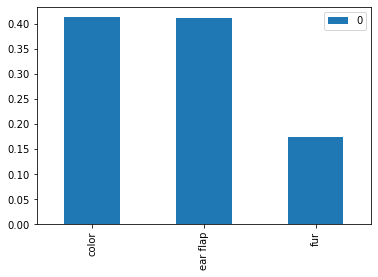

In [35]:
feature_imp.head(10).plot(kind='bar')

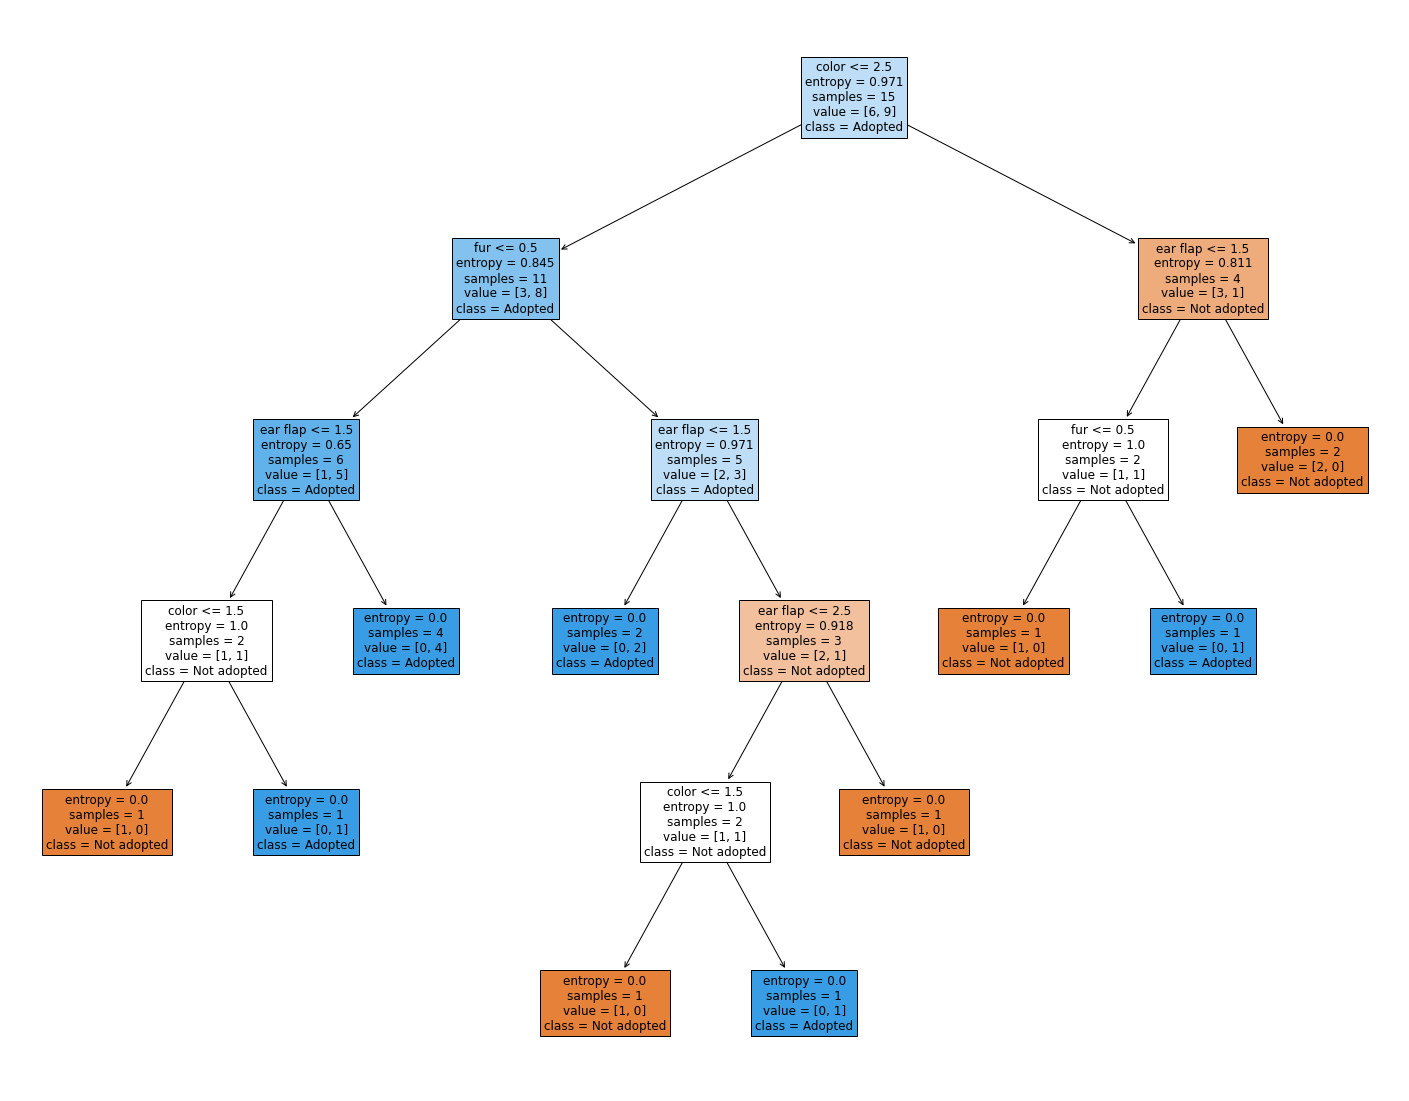

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier_dt,
                  feature_names = feature_names,
                  class_names = {0:'Not adopted', 1:"Adopted"},
                  filled=True,
                  fontsize=12
                  )